In [1]:
import json

def parse_re(input_re: str):
    try:
        return_dict = json.loads(input_re)
    except json.decoder.JSONDecodeError:
        return_dict = dict()
    finally:
        return return_dict

In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import requests
import pprint
import json

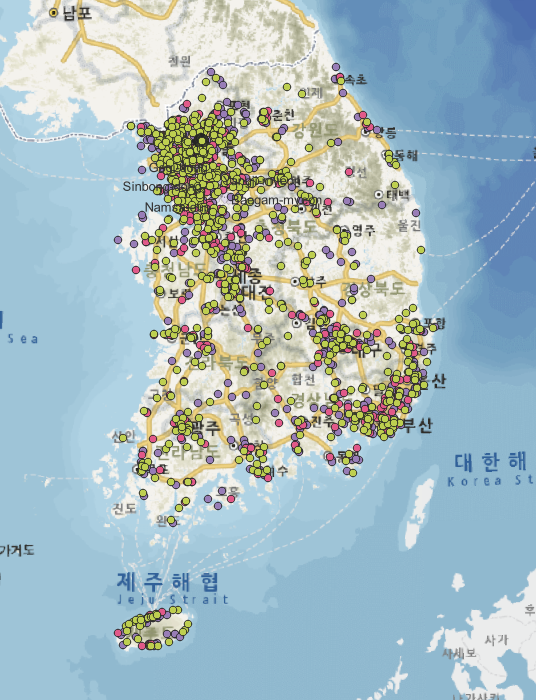

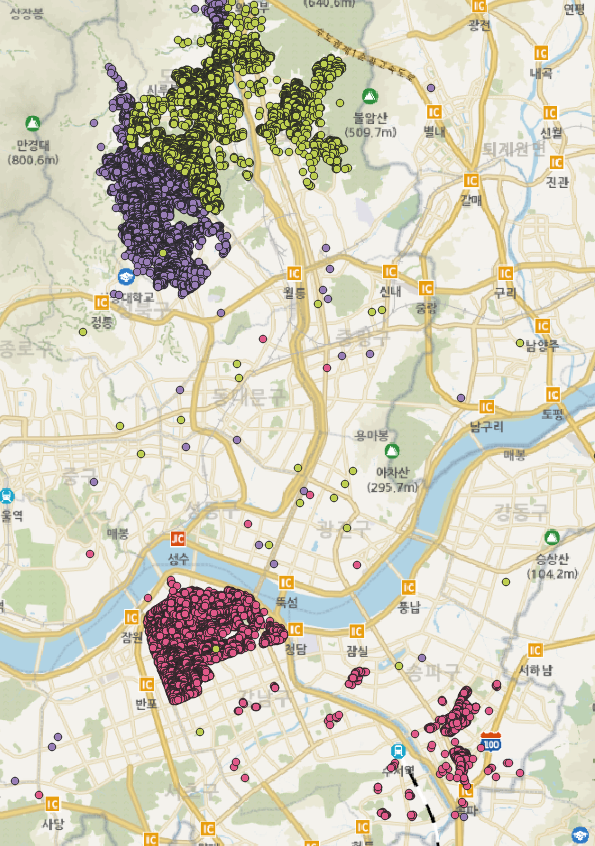

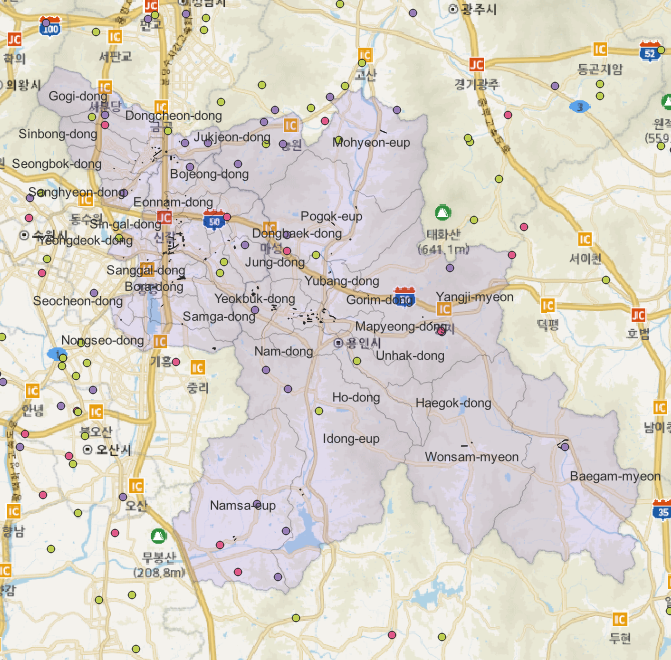

'totalCount': '1,761,291'

자료로 쓸지 쓰지 않을진 모르지만 과정중 하나. 찾으면 정리된 데이터들이 엄청 많다. 약 176만 여개의 주차장 위경도 데이터들을 정리되어 있는 데이터인데, 원하는 범위 내의 주차장들만 알고 싶은 아쉬움이 있는 open api 자료이다. 그리구 해당 자료는 개인 사유 주차장인가? 싶은 생각이 듦. (전국 176만여개인데 한 번 불러올 때 9999여개 불러올 수 있음.. ㅇ.ㅇ)

## 1

In [13]:
url = 'http://apis.data.go.kr/B553881/Parking/PrkSttusInfo?serviceKey=AV3R%2FgAmU5N%2Fl2MG1S7ssv3lk4u18kkjaY6W4nRP6ki1s8gTSWqHIlknAMmLjtisUlwKvFS6%2FTEob0ZCxZUvxA%3D%3D&pageNo=1&numOfRows=9999&format=2'

response = requests.get(url)
contents = response.text
json_ob = parse_re(contents)
body = json_ob['PrkSttusInfo']

# 데이터프레임으로 변환
dataframe = pd.DataFrame(body)

In [14]:
json_ob

{'PrkSttusInfo': [{'prk_cmprt_co': '1',
   'prk_center_id': '01000-29391-00001-00-1',
   'prk_plce_entrc_lo': '37.6660191314',
   'prk_plce_entrc_la': '127.0098198673',
   'prk_plce_nm': '',
   'prk_plce_adres': ''},
  {'prk_cmprt_co': '2',
   'prk_center_id': '01000-29391-00002-00-1',
   'prk_plce_entrc_lo': '37.6657956771',
   'prk_plce_entrc_la': '127.0099513131',
   'prk_plce_nm': '',
   'prk_plce_adres': ''},
  {'prk_cmprt_co': '1',
   'prk_center_id': '01000-29391-00003-00-1',
   'prk_plce_entrc_lo': '37.6660334977',
   'prk_plce_entrc_la': '127.0103956418',
   'prk_plce_nm': '',
   'prk_plce_adres': ''},
  {'prk_cmprt_co': '1',
   'prk_center_id': '01000-29391-00004-00-1',
   'prk_plce_entrc_lo': '37.666307389',
   'prk_plce_entrc_la': '127.0104727522',
   'prk_plce_nm': '',
   'prk_plce_adres': ''},
  {'prk_cmprt_co': '1',
   'prk_center_id': '01000-29391-00005-00-1',
   'prk_plce_entrc_lo': '37.6667831064',
   'prk_plce_entrc_la': '127.0104773527',
   'prk_plce_nm': '',
   'pr

In [15]:
dataframe

,prk_cmprt_co,prk_center_id,prk_plce_entrc_lo,prk_plce_entrc_la,prk_plce_nm,prk_plce_adres
0,1,01000-29391-00001-00-1,37.6660191314,127.0098198673,,
1,2,01000-29391-00002-00-1,37.6657956771,127.0099513131,,
2,1,01000-29391-00003-00-1,37.6660334977,127.0103956418,,
3,1,01000-29391-00004-00-1,37.666307389,127.0104727522,,
4,1,01000-29391-00005-00-1,37.6667831064,127.0104773527,,
...,...,...,...,...,...,...
9994,4,01305-29391-00032-00-1,37.6818143774,127.0443620154,,
9995,1,01305-29391-00033-00-1,37.6818612963,127.0441806592,,
9996,1,01305-29391-00034-00-1,37.6820090448,127.0442124891,,
9997,6,01305-29391-00035-00-1,37.6821280062,127.0441264019,동훈빌라,


In [16]:
dataframe.to_excel('전국 주차장 정보 page 1.xlsx')

## 2

In [17]:
url = 'http://apis.data.go.kr/B553881/Parking/PrkSttusInfo?serviceKey=AV3R%2FgAmU5N%2Fl2MG1S7ssv3lk4u18kkjaY6W4nRP6ki1s8gTSWqHIlknAMmLjtisUlwKvFS6%2FTEob0ZCxZUvxA%3D%3D&pageNo=2&numOfRows=9999&format=2'

response = requests.get(url)
contents = response.text
json_ob = parse_re(contents)
body = json_ob['PrkSttusInfo']

# 데이터프레임으로 변환
dataframe = pd.DataFrame(body)

In [18]:
dataframe

,prk_cmprt_co,prk_center_id,prk_plce_entrc_lo,prk_plce_entrc_la,prk_plce_nm,prk_plce_adres
0,2,01305-29391-00037-00-1,37.6813170699,127.0442755624,,
1,2,01305-29391-00038-00-1,37.6812341645,127.0443163243,,
2,3,01305-29391-00039-00-1,37.6811512592,127.044357086,,
3,1,01305-29391-00040-00-1,37.6815296854,127.0443165001,,
4,2,01305-29391-00041-00-1,37.6814719373,127.0445431948,,
...,...,...,...,...,...,...
9994,141,01762-29391-00007-00-1,37.6538192938,127.0602195683,KB금융 노원PLAZA,
9995,28,01762-29391-00008-00-1,37.6536828084,127.0593038141,상계동 7320000 업무시설 (주식회사안스460 대표이사안호범),
9996,7,01762-29391-00009-00-1,37.6533512014,127.0593942078,,
9997,6,01762-29391-00010-00-1,37.6534051391,127.0596344931,,


In [19]:
dataframe.to_excel('전국 주차장 정보 page 2.xlsx')

## 3

In [20]:
url = 'http://apis.data.go.kr/B553881/Parking/PrkSttusInfo?serviceKey=AV3R%2FgAmU5N%2Fl2MG1S7ssv3lk4u18kkjaY6W4nRP6ki1s8gTSWqHIlknAMmLjtisUlwKvFS6%2FTEob0ZCxZUvxA%3D%3D&pageNo=15&numOfRows=9999&format=2'

response = requests.get(url)
contents = response.text
json_ob = parse_re(contents)
body = json_ob['PrkSttusInfo']

# 데이터프레임으로 변환
dataframe = pd.DataFrame(body)

In [21]:
dataframe

,prk_cmprt_co,prk_center_id,prk_plce_entrc_lo,prk_plce_entrc_la,prk_plce_nm,prk_plce_adres
0,4,05807-29391-00064-00-1,37.4852380241,127.1260474734,해진빌딩,
1,4,05807-29391-00065-00-1,37.4852273711,127.1258982067,,
2,6,05807-29391-00066-00-1,37.4852026624,127.1254097148,,
3,6,05807-29391-00067-00-1,37.4851955983,127.1252740223,,
4,8,05807-29391-00068-00-1,37.4851885484,127.1251247618,스타뷰,
...,...,...,...,...,...,...
9994,15,06137-29391-00148-00-1,36.8929052787,126.6366337894,,
9995,1,06137-29391-00149-00-1,,,,
9996,5,06137-29392-00022-00-1,37.5073375295,127.0387482954,,
9997,5,06137-29392-00048-00-1,37.5070058659,127.0390331365,,


In [22]:
dataframe.to_excel('전국 주차장 정보 page 3.xlsx')